**Importing the data**

In [ ]:
#https://www.kaggle.com/code/shashwatwork/beating-covid-19-with-tweets/notebook
#https://www.kaggle.com/code/andradaolteanu/covid-19-sentiment-analysis-social-networks
#https://www.kaggle.com/code/himanshutripathi/covid-19-tweets-analysis-97-accuracy#Reading-the-dataset-%F0%9F%98%81

In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#For uploading and accessing the data
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
!pip install dexplot -q
!pip install pycaret -q
!pip install stylecloud -q
# for visualizations
plt.style.use('ggplot')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

from pandas_profiling import ProfileReport

import dexplot as dxp


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Nltk for tokenize and stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import requests
from PIL import Image
from io import BytesIO
from wordcloud import WordCloud, STOPWORDS
import stylecloud
from wordcloud import ImageColorGenerator
RANDOM_SEED = 42

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [4]:
dataset_dir = '/content/drive/My Drive/Colab Notebooks/IS434-project/output/'

In [5]:
df = pd.read_csv(dataset_dir + 'combinedtweets+preprocessed.csv')

In [10]:
def missing_value_of_data(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percentage=round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def duplicated_values_data(data):
    dup=[]
    columns=data.columns
    for i in data.columns:
        dup.append(sum(data[i].duplicated()))
    return pd.concat([pd.Series(columns),pd.Series(dup)],axis=1,keys=['Columns','Duplicate count'])

def unique_values_in_column(data,feature):
    unique_val=pd.Series(data.loc[:,feature].unique())
    return pd.concat([unique_val],axis=1,keys=['Unique Values'])

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

def ngrams_top(corpus,ngram_range,n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english',ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df

In [11]:
missing_value_of_data(df)



,Total,Percentage
UserLocation,897,40.50
cleaned_tweets,196,8.85
Unnamed: 0.1,0,0.00
Unnamed: 0,0,0.00
Datetime,0,0.00
TweetID,0,0.00
URL,0,0.00
likeCount,0,0.00
retweetCount,0,0.00
Text,0,0.00


In [12]:
duplicated_values_data(df)

,Columns,Duplicate count
0,Unnamed: 0.1,1547
1,Unnamed: 0,1547
2,Datetime,15
3,TweetID,0
4,URL,0
5,UserLocation,2210
6,likeCount,370
7,retweetCount,1255
8,Text,21
9,Username,2209


In [14]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,TweetID,URL,UserLocation,likeCount,retweetCount,Text,Username,cleaned_tweets
0,0,0,2023-02-27 05:22:43+00:00,1630075935687950339,https://twitter.com/b_dechambeau/status/163007...,"Dallas, TX",14,0,@FanpageWolff 😂😂,b_dechambeau,fanpagewolff
1,1,1,2023-02-27 04:51:53+00:00,1630068179253829632,https://twitter.com/b_dechambeau/status/163006...,"Dallas, TX",621,19,One heck of a team 🏆,b_dechambeau,one heck team
2,2,2,2023-02-14 17:14:33+00:00,1625544032498728970,https://twitter.com/b_dechambeau/status/162554...,"Dallas, TX",265,24,The answer is simple. 💪 @Crushers_GC \n\n#LIVG...,b_dechambeau,answer is simple crushers gc livgolf crushersgc
3,3,3,2023-02-13 01:07:51+00:00,1624938366511841280,https://twitter.com/b_dechambeau/status/162493...,"Dallas, TX",273,8,That Bluemoon commercial 😂,b_dechambeau,that bluemoon commercial
4,4,4,2023-02-07 22:45:40+00:00,1623090646461386754,https://twitter.com/b_dechambeau/status/162309...,"Dallas, TX",720,24,Time to Crush it 💣 @Crushers_GC https://t.co/q...,b_dechambeau,time crush it crushers gc


In [15]:
count_values_in_column(df,'UserLocation')

,Total,Percentage
NaN,897,40.50
houston texas babyyyy,610,27.54
"Dallas, TX",344,15.53
YAHWEH,285,12.87
United Kingdom,79,3.57


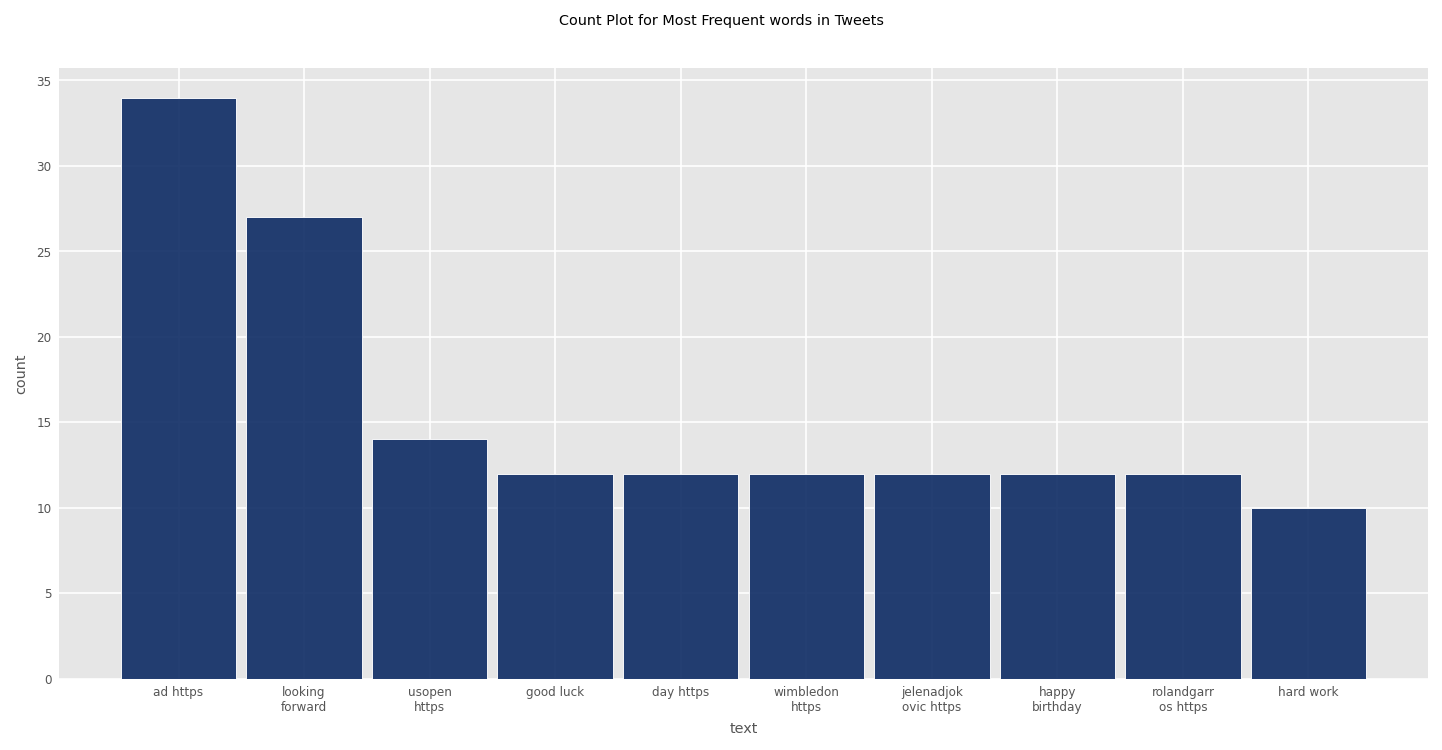

In [17]:
dd_22 = ngrams_top(df['Text'],(2,2),n=10)
dxp.bar(x='text', y='count', data=dd_22,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

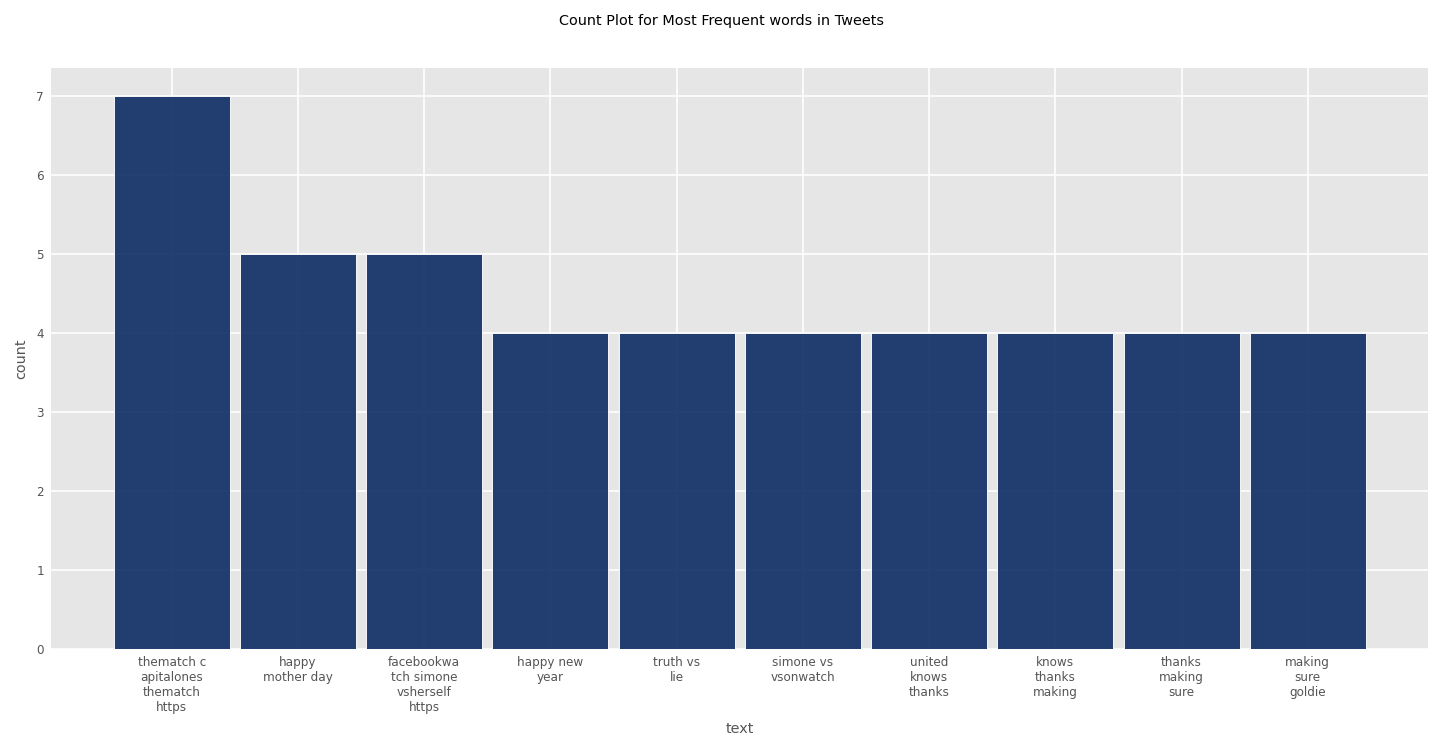

In [18]:
dd_33 = ngrams_top(df['Text'],(3,3),n=10)
dxp.bar(x='text', y='count', data=dd_33,figsize=(10,5),cmap='dark12_r',title='Count Plot for Most Frequent words in Tweets')

In [20]:
Top10_user = pd.DataFrame(df['Username'].value_counts().sort_values(ascending=False)[:10]).reset_index()
Top10_user.columns = ['Username','count']

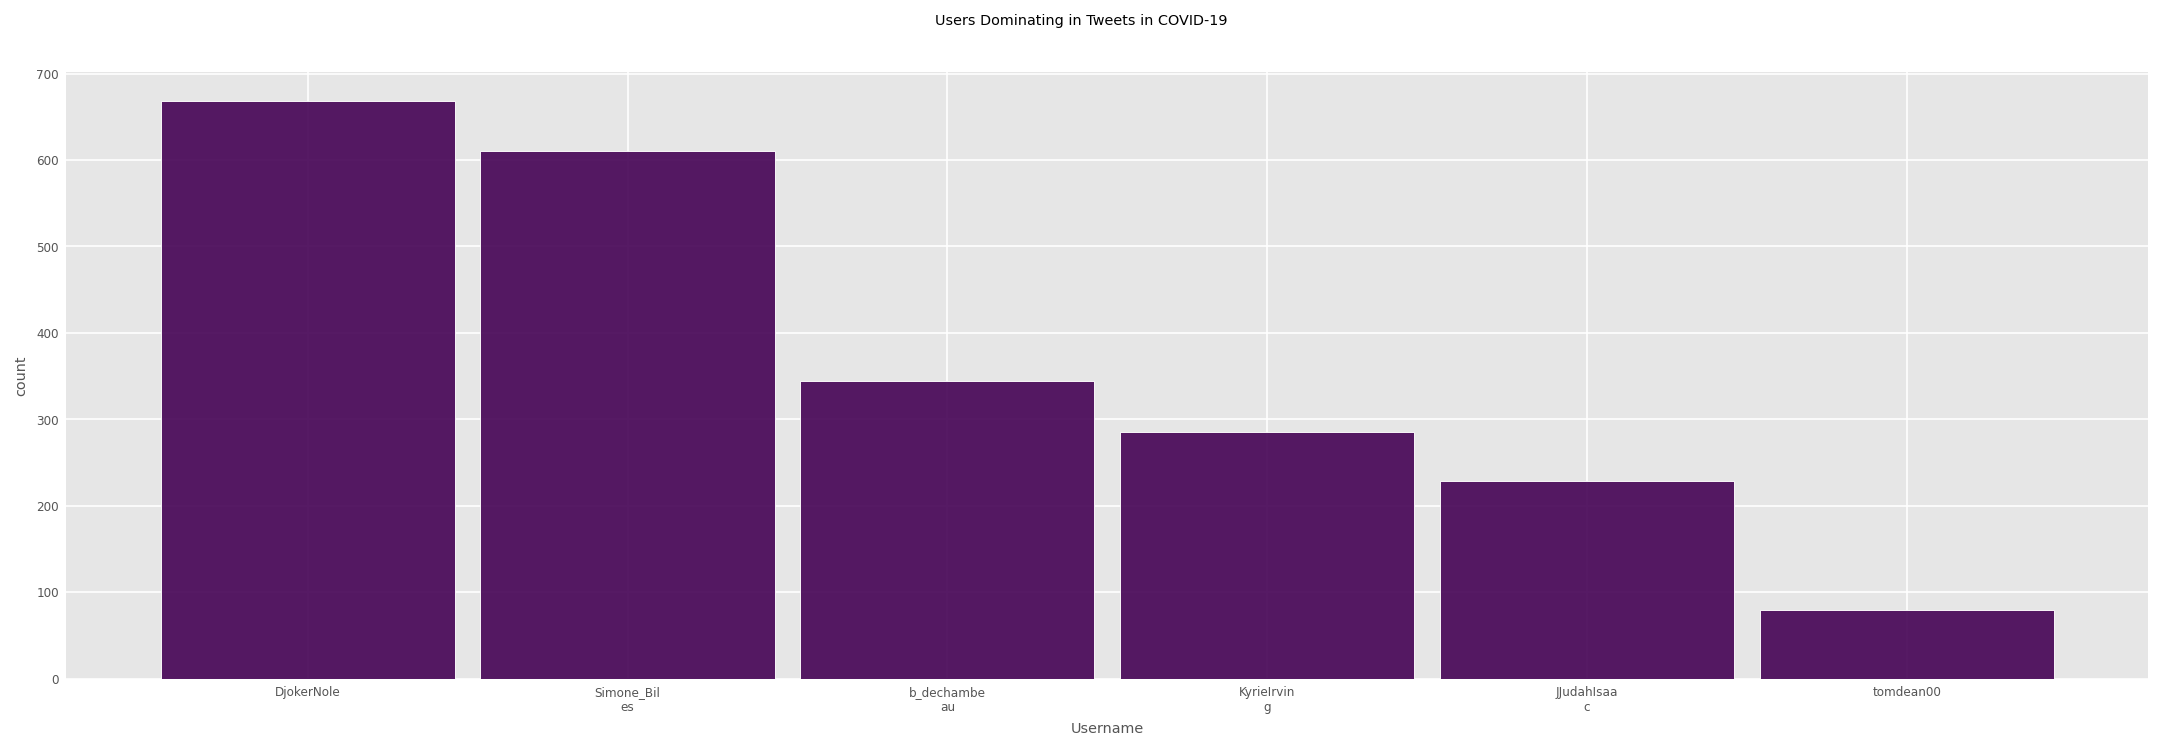

In [22]:
dxp.bar(x='Username', y='count', data=Top10_user,figsize=(15,5),cmap='viridis',title='Users Dominating in Tweets')